In [1]:
#import dependencies
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

# from config import weather_api_key 
from config import weather_api_key
#Import datetime from datetime
from datetime import datetime

import requests

In [2]:
# create a set of random lats and longs combination
lats =np.random.uniform(-90,90,size=1500)
lngs =np.random.uniform(-180, 180, size =1500)
lats_lngs = zip(lats, lngs)
lats_lngs


In [3]:
#create a practice set of random lat and long
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]

coordinates = zip(x,y)


In [4]:
#Use the tuple() function to display the latitude and longitude combintaion
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Use the citipy module to determine city based on lats and longs
from citipy import citipy
coordinates = list(lats_lngs)

In [6]:
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0],coordinate[1]).city_name,
           citipy.nearest_city(coordinate[0],coordinate[1]).country_code
          )

tongsa bt
ushuaia ar
busselton au
tiksi ru
hobart au
gurgan az
at-bashi kg
acapulco mx
mataura pf
tuktoyaktuk ca
port-gentil ga
grindavik is
ushuaia ar
sitka us
qaanaaq gl
umm kaddadah sd
norman wells ca
rikitea pf
port alfred za
flin flon ca
teya ru
bichena et
ketchikan us
ituni gy
gamba ga
swan hill au
bluff nz
norman wells ca
saskylakh ru
dunedin nz
chifeng cn
awbari ly
kudligi in
port moresby pg
qaanaaq gl
yellowknife ca
skibotn no
barrow us
baykit ru
punta arenas cl
chokurdakh ru
biltine td
hilo us
umzimvubu za
ponta do sol cv
puerto ayora ec
rockhampton au
qaanaaq gl
tsihombe mg
hobart au
xining cn
cagayan de tawi-tawi ph
antalaha mg
iqaluit ca
salihli tr
batemans bay au
marcona pe
taolanaro mg
namatanai pg
ushuaia ar
goderich sl
falmouth gb
jamestown sh
punta arenas cl
bambous virieux mu
ushuaia ar
cape town za
dikson ru
tsihombe mg
punta arenas cl
galbshtadt ru
albany au
ushuaia ar
rikitea pf
havoysund no
hobart au
itarema br
yellowknife ca
mataura pf
san cristobal ec
natal br


cape town za
bluff nz
sharjah ae
hermanus za
krasnoselkup ru
vao nc
ban tak th
bluff nz
hermanus za
carnarvon au
hasaki jp
unye tr
gambiran id
mataura pf
barrow us
cidreira br
tiksi ru
viedma ar
inhambane mz
hithadhoo mv
tsihombe mg
tuktoyaktuk ca
dikson ru
carnarvon au
caravelas br
mataura pf
qaanaaq gl
makinsk kz
barrow us
busselton au
manga br
carnarvon au
hilo us
nikolskoye ru
barrow us
kaeo nz
ushuaia ar
rungata ki
coquimbo cl
cape town za
high level ca
qaanaaq gl
mitsamiouli km
cape town za
kodiak us
cape town za
iqaluit ca
bonney lake us
leshukonskoye ru
fare pf
hermanus za
busselton au
leh in
sorland no
cayenne gf
ushuaia ar
ust-kuyga ru
harper lr
chuy uy
saint-philippe re
busselton au
norman wells ca
attawapiskat ca
vaini to
avarua ck
new norfolk au
ribeira grande pt
rikitea pf
kaeo nz
nome us
atuona pf
cairns au
inhambane mz
te anau nz
qaanaaq gl
mocambique mz
nguiu au
ladson us
hilo us
mataura pf
meinung tw
dongsheng cn
taolanaro mg
nanortalik gl
albany au
lebu cl
hermanus z

In [7]:
# create the list of the cities which are unique

cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
cities
len(cities)

604

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935'

In [9]:
#Create an empty list to hold the weather data
city_data =[]

#print the begining of the logging
print("Begining Data Retrieval")
print("-----------------------")

#create counters
record_count = 1 
set_count = 1


# Loop through all the cities in our list:
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes:
    if (i%50==0 and i>50):
        set_count +=1
        record_count =1
    city = city.replace(" ","+")
    # create endpoint URL with each city.
    city_url = url+"&q="+city
    
    #logging the URL record, and set numbers and the city
    print(f"Processing Record {record_count} of set {set_count} | {city}")
    print(city_url)
    
    # Add 1  to the record count 
    record_count +=1
    
    # Run an API request for each of the cities.
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Begining Data Retrieval
-----------------------
Processing Record 1 of set 1 | tongsa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=tongsa
City not found. Skipping...
Processing Record 2 of set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=ushuaia
Processing Record 3 of set 1 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=busselton
Processing Record 4 of set 1 | tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=tiksi
Processing Record 5 of set 1 | hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=hobart
Processing Record 6 of set 1 | gurgan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=gurgan
City not found. Skipping...
Pr

Processing Record 55 of set 1 | goderich
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=goderich
Processing Record 56 of set 1 | falmouth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=falmouth
Processing Record 57 of set 1 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=jamestown
Processing Record 58 of set 1 | bambous+virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=bambous+virieux
Processing Record 59 of set 1 | cape+town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=cape+town
Processing Record 60 of set 1 | dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=dikson
Processing Record 61 of set 1 | galbshtadt
http://api.openweathermap

Processing Record 8 of set 2 | castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=castro
Processing Record 9 of set 2 | bandarbeyla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=bandarbeyla
Processing Record 10 of set 2 | bambanglipuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=bambanglipuro
Processing Record 11 of set 2 | east+london
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=east+london
Processing Record 12 of set 2 | bouca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=bouca
Processing Record 13 of set 2 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=komsomolskiy
Processing Record 14 of set 2 | zlatoustovsk
http://api.openweat

Processing Record 11 of set 3 | bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=bengkulu
Processing Record 12 of set 3 | mokhsogollokh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=mokhsogollokh
Processing Record 13 of set 3 | belmonte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=belmonte
Processing Record 14 of set 3 | codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=codrington
Processing Record 15 of set 3 | new+norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=new+norfolk
Processing Record 16 of set 3 | reconquista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=reconquista
Processing Record 17 of set 3 | pozo+colorado
http://api

Processing Record 14 of set 4 | torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=torbay
Processing Record 15 of set 4 | alihe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=alihe
Processing Record 16 of set 4 | taoudenni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=taoudenni
Processing Record 17 of set 4 | isangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=isangel
Processing Record 18 of set 4 | vikulovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=vikulovo
Processing Record 19 of set 4 | boysun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=boysun
Processing Record 20 of set 4 | asau
http://api.openweathermap.org/data/2.5/weather?units=Imperi

Processing Record 18 of set 5 | primo+tapia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=primo+tapia
Processing Record 19 of set 5 | tual
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=tual
Processing Record 20 of set 5 | muros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=muros
Processing Record 21 of set 5 | tautira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=tautira
Processing Record 22 of set 5 | san+patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=san+patricio
Processing Record 23 of set 5 | hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=hasaki
Processing Record 24 of set 5 | upernavik
http://api.openweathermap.org/data/2.5/weather

Processing Record 21 of set 6 | viedma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=viedma
Processing Record 22 of set 6 | lakatoro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=lakatoro
Processing Record 23 of set 6 | karla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=karla
Processing Record 24 of set 6 | lerwick
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=lerwick
Processing Record 25 of set 6 | ixtapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=ixtapa
Processing Record 26 of set 6 | kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=kaitangata
Processing Record 27 of set 6 | bokspits
http://api.openweathermap.org/data/2.5/weather?units=

Processing Record 24 of set 7 | lolua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=lolua
City not found. Skipping...
Processing Record 25 of set 7 | ibimirim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=ibimirim
Processing Record 26 of set 7 | sharjah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=sharjah
Processing Record 27 of set 7 | krasnoselkup
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=krasnoselkup
Processing Record 28 of set 7 | vao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=vao
Processing Record 29 of set 7 | ban+tak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=ban+tak
Processing Record 30 of set 7 | unye
http://api.openweathermap.org

Processing Record 27 of set 8 | bonavista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=bonavista
Processing Record 28 of set 8 | haibowan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=haibowan
City not found. Skipping...
Processing Record 29 of set 8 | broken+hill
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=broken+hill
Processing Record 30 of set 8 | luau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=luau
Processing Record 31 of set 8 | antofagasta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=antofagasta
Processing Record 32 of set 8 | solenzo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=solenzo
Processing Record 33 of set 8 | sumkino
http://api

Processing Record 31 of set 9 | otane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=otane
Processing Record 32 of set 9 | manggar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=manggar
Processing Record 33 of set 9 | nizhneyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=nizhneyansk
City not found. Skipping...
Processing Record 34 of set 9 | altoona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=altoona
Processing Record 35 of set 9 | aripuana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=aripuana
Processing Record 36 of set 9 | oranjestad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=oranjestad
Processing Record 37 of set 9 | sibolga
http://api.ope

Processing Record 33 of set 10 | booue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=booue
Processing Record 34 of set 10 | algiers
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=algiers
Processing Record 35 of set 10 | honiara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=honiara
Processing Record 36 of set 10 | caxito
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=caxito
Processing Record 37 of set 10 | maneadero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=maneadero
Processing Record 38 of set 10 | lima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=lima
Processing Record 39 of set 10 | alta+floresta
http://api.openweathermap.org/data/2.5/weather?un

Processing Record 36 of set 11 | kyra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=kyra
Processing Record 37 of set 11 | torit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=torit
Processing Record 38 of set 11 | doha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=doha
Processing Record 39 of set 11 | yilan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=yilan
Processing Record 40 of set 11 | bolshoye+sorokino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=bolshoye+sorokino
City not found. Skipping...
Processing Record 41 of set 11 | rio+gallegos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=rio+gallegos
Processing Record 42 of set 11 | sulangan
http://a

In [11]:
print(city_data)

[{'City': 'Ushuaia', 'Lat': -54.8, 'Lng': -68.3, 'Max Temp': 42.8, 'Humidity': 75, 'Cloudiness': 75, 'Wind Speed': 20.71, 'Country': 'AR', 'Date': '2021-01-30 00:57:50'}, {'City': 'Busselton', 'Lat': -33.65, 'Lng': 115.3333, 'Max Temp': 73, 'Humidity': 60, 'Cloudiness': 0, 'Wind Speed': 4, 'Country': 'AU', 'Date': '2021-01-30 00:57:38'}, {'City': 'Tiksi', 'Lat': 71.6872, 'Lng': 128.8694, 'Max Temp': -32.17, 'Humidity': 84, 'Cloudiness': 100, 'Wind Speed': 4.54, 'Country': 'RU', 'Date': '2021-01-30 00:53:21'}, {'City': 'Hobart', 'Lat': -42.8794, 'Lng': 147.3294, 'Max Temp': 73.99, 'Humidity': 46, 'Cloudiness': 75, 'Wind Speed': 4.61, 'Country': 'AU', 'Date': '2021-01-30 00:54:28'}, {'City': 'At-Bashi', 'Lat': 41.1702, 'Lng': 75.8106, 'Max Temp': 1.38, 'Humidity': 51, 'Cloudiness': 0, 'Wind Speed': 2.55, 'Country': 'KG', 'Date': '2021-01-30 01:02:00'}, {'City': 'Acapulco', 'Lat': 16.8634, 'Lng': -99.8901, 'Max Temp': 82.4, 'Humidity': 74, 'Cloudiness': 75, 'Wind Speed': 10.36, 'Country':

In [13]:
# convert the city_data array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,42.80,75,75,20.71,AR,2021-01-30 00:57:50
1,Busselton,-33.6500,115.3333,73.00,60,0,4.00,AU,2021-01-30 00:57:38
2,Tiksi,71.6872,128.8694,-32.17,84,100,4.54,RU,2021-01-30 00:53:21
3,Hobart,-42.8794,147.3294,73.99,46,75,4.61,AU,2021-01-30 00:54:28
4,At-Bashi,41.1702,75.8106,1.38,51,0,2.55,KG,2021-01-30 01:02:00
5,Acapulco,16.8634,-99.8901,82.40,74,75,10.36,MX,2021-01-30 00:57:09
6,Mataura,-46.1927,168.8643,67.89,40,0,2.33,NZ,2021-01-30 00:57:42
7,Tuktoyaktuk,69.4541,-133.0374,-36.40,74,20,2.30,CA,2021-01-30 00:53:06
8,Port-Gentil,-0.7193,8.7815,80.28,82,100,7.90,GA,2021-01-30 01:01:36
9,Grindavik,63.8424,-22.4338,35.60,75,75,2.30,IS,2021-01-30 01:02:00


In [15]:
# reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-01-30 00:57:50,-54.8000,-68.3000,42.80,75,75,20.71
1,Busselton,AU,2021-01-30 00:57:38,-33.6500,115.3333,73.00,60,0,4.00
2,Tiksi,RU,2021-01-30 00:53:21,71.6872,128.8694,-32.17,84,100,4.54
3,Hobart,AU,2021-01-30 00:54:28,-42.8794,147.3294,73.99,46,75,4.61
4,At-Bashi,KG,2021-01-30 01:02:00,41.1702,75.8106,1.38,51,0,2.55
5,Acapulco,MX,2021-01-30 00:57:09,16.8634,-99.8901,82.40,74,75,10.36
6,Mataura,NZ,2021-01-30 00:57:42,-46.1927,168.8643,67.89,40,0,2.33
7,Tuktoyaktuk,CA,2021-01-30 00:53:06,69.4541,-133.0374,-36.40,74,20,2.30
8,Port-Gentil,GA,2021-01-30 01:01:36,-0.7193,8.7815,80.28,82,100,7.90
9,Grindavik,IS,2021-01-30 01:02:00,63.8424,-22.4338,35.60,75,75,2.30


In [19]:
# create the output file csv
output_data_file = "weather_data/cities.csv"

#Export the City Data into a csv
city_data_df.to_csv(output_data_file,index_label="City_ID")


### 6.3.1 == Scatter plots

In [21]:
# Extract relevant feilds from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

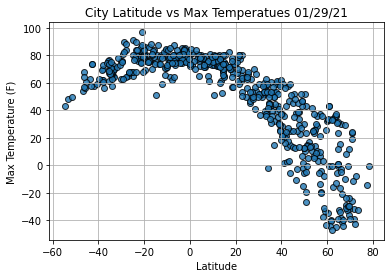

In [29]:
# import time module
import time
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1,marker="o", alpha=0.8, label="Cities")
plt.grid('True')
plt.title(f"City Latitude vs Max Temperatues " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

#save the figures
plt.savefig("weather_data/lat_vs_max_temp.png")

#show plt
plt.show()

### 6.3.2 Scatter plot latitudes vs Humidity

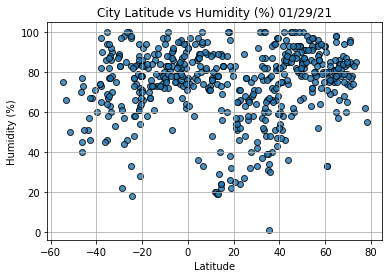

In [33]:
plt.scatter(lats, humidity,
            edgecolor="black", linewidths=1, marker="o", alpha=0.8,label="Cities"
            )
plt.grid("True")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%) "+time.strftime("%x"))

#save the figure
plt.savefig("weather_data/lat_vs_humidity.png")

#show the plt
plt.show()

### 6.3.3 scatter plot lat vs cloudiness (%)

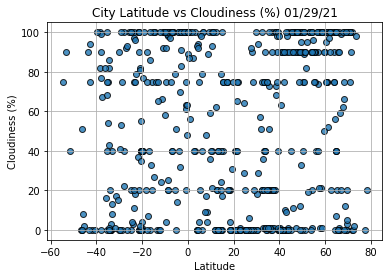

In [37]:
### 6.3.3 Scatter plot lat vs cloudiness (%)
plt.scatter(lats, cloudiness,
           edgecolor="black", marker="o", alpha=0.8, label="Cities")

plt.grid("True")
plt.title(f"City Latitude vs Cloudiness (%) "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#save the fif
plt.savefig("weather_data/lat_vs_cloudiness.png")

#plot show
plt.show()

### 6.3.4 scatter plot vs Wind Speed

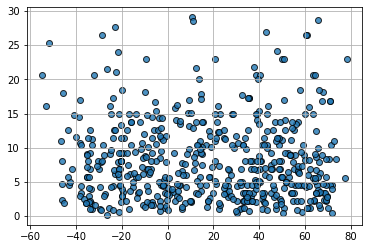

In [41]:
plt.scatter(lats, wind_speed,
            edgecolor="black",
            marker ="o",
            alpha=0.8,
            label="Cities"
            )
plt.grid("True")
plt.title(f"City Latitude vs Wind Speed (mph) "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylable